<a href="https://colab.research.google.com/github/sahug/ds-nlp/blob/main/NLP%20-%20Session%204%20-%20SpaCy%20Introduction%20for%20NLP%20-%20Linguistic%20Features%20Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NLP - Session 4 - SpaCy Introduction for NLP - Linguistic Features Extraction**

#### Getting Started with spaCy
This tutorial is a crisp and effective introduction to spaCy and the various NLP linguistic features it offers.We will perform several NLP related tasks, such as Tokenization, part-of-speech tagging, named entity recognition, dependency parsing and Visualization using displaCy.

spaCy is a free, open-source library for advanced Natural Language Processing (NLP) in Python.spaCy is designed specifically for production use and helps you build applications that process and understand large volumes of text. It’s written in Cython and is designed to build information extraction or natural language understanding systemor to pre-process text for deep learning.

#### Linguistic Features in spaCy
Processing raw text intelligently is difficult: most words are rare, and it’s common for words that look completely different to mean almost the same thing.

That’s exactly what spaCy is designed to do: you put in raw text, and get back a Doc object, that comes with a variety of Linguistic annotations.

spaCy acts as a one-stop-shop for various tasks used in NLP projects, such as Tokenization, Lemmatisation, Part-of-speech(POS) tagging, Name entity recognition, Dependency parsing, Sentence Segmentation, Word-to-vector transformations, and other cleaning and normalization text methods.

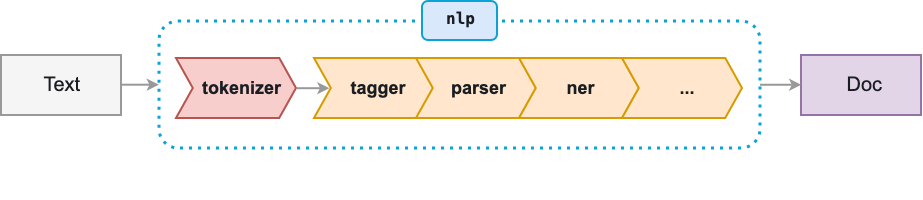

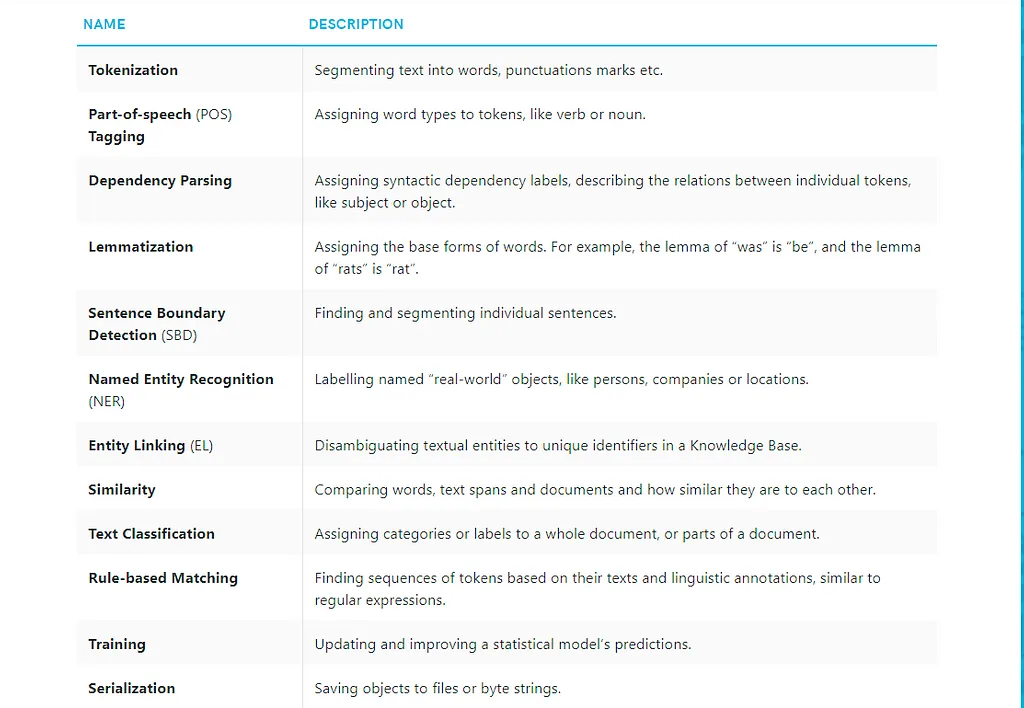

#### Download Below Packages

`conda install --name tensorflow20 -c conda-forge spacy`

`conda install --name tensorflow20 -c conda-forge spacy-model-en_core_web_sm`

`conda install --name tensorflow20 -c conda-forge spacy-lookups-data`

In [ ]:
import spacy

`en_core_web_sm` -  Is a SpaCy trained model. 

In [ ]:
nlp = spacy.load("en_core_web_sm")

## Tokenization
Tokenization is the task of splitting a text into meaningful segments called tokens. The input to the tokenizer is a unicode text and the output is a Doc object.

A Doc is a sequence of Token objects. Each Doc consists of individual tokens, and we can iterate over them.

In [ ]:
doc = nlp("Apple is looking at buying U.K startup for $1 billion")

In [ ]:
for token in doc:
    print(token.text)

Now look how SpaCy tokenizes `"isn't"` into `"is"` and `"n't"`. This shows it is a very smart model.

In [ ]:
doc = nlp("Apple isn't looking at buying U.K startup for $1 billion")

In [ ]:
for token in doc:
    print(token.text)

## Lemmatization
A work-related to tokenization, lemmatization is the method of decreasing the word to its base form, or origin form. This reduced form or root word is called a lemma.

For example, organizes, organized and organizing are all forms of organize. Here, organize is the lemma.

Lemmatization is necessary because it helps to reduce the inflected forms of a word so that they can be analyzed as a single item. It can also help you normalize the text.

In [ ]:
doc

In [ ]:
for token in doc:
    print(token.text, token.lemma_)

Formatting the output for better view.

In [ ]:
for token in doc:
    print(f"{token.text:{15}} {token.lemma_:{15}}")

## Part-of-speech tagging [POS]
Part of speech tagging is the process of assigning a POS tag to each token depending on its usage in the sentence.

In [ ]:
for token in doc:
    print(f"{token.text:{15}} {token.lemma_:{15}} {token.pos_:{10}}")

## Stopwords
 - 0 : False
 - 1 : True

In [ ]:
for token in doc:
    print(
        f"{token.text:{15}} {token.lemma_:{15}} {token.pos_:{10}} {token.is_stop:{10}}"
    )

## Dependency Parsing
Dependency parsing is the process of extracting the dependency parse of a sentence to represent its grammatical structure. It defines the dependency relationship between headwords and their dependents. The head of a sentence has no dependency and is called the root of the sentence. The verb is usually the head of the sentence. All other words are linked to the headword.

Noun chunks are “base noun phrases” – flat phrases that have a noun as their head.To get the noun chunks in a document, simply iterate over Doc.noun_chunks.

In [ ]:
for chunk in doc.noun_chunks:
    print(f"{chunk.text:{15}} {chunk.root.text:{15}} {chunk.root.dep_}")

## Named Entity Recognition
Named Entity Recognition (NER) is the process of locating named entities in unstructured text and then classifying them into pre-defined categories, such as person names, organizations, locations, monetary values, percentages, time expressions, and so on.

It is used to populate tags for a set of documents in order to improve the keyword search. Named entities are available as the ents property of a Doc.

In [ ]:
for ent in doc.ents:
    print(f"{ent.text:{15}} {ent.label_:{15}}")

## Sentence Segmentation
Sentence Segmentation is the process of locating the start and end of sentences in a given text. This allows you to you divide a text into linguistically meaningful units.SpaCy uses the dependency parse to determine sentence boundaries. In spaCy, the sents property is used to extract sentences.

In [ ]:
for sent in doc.sents:
    print(sent)

In [ ]:
doc_1 = nlp("Welcome to the world. Thanks for being here. Please love and prosper")
doc_1

In [ ]:
for sent in doc_1.sents:
    print(sent)

SpaCy has a predefined set of rules by which it segments the sentences. You can create your own rules if the predifened rules doesn't work.

As you can see how SpaCy doesn't properly segments the below statement.

In [ ]:
doc_1 = nlp("Welcome to the...world...Thanks for being here.")
doc_1

In [ ]:
for sent in doc_1.sents:
    print(sent)

#### Defining custom rule.

In [ ]:
def set_rule(doc):
    for token in doc[:-1]:
        if token.text == "...":
            doc[token.i + 1].is_sent_start = True
    return doc

In [ ]:
nlp.add_pipe(set_rule, before="parser")
doc_1 = nlp("Welcome to the...world...Thanks for being here.")

In [ ]:
for sent in doc_1.sents:
    print(sent)

In [ ]:
# Only when rerunning we need to remove it
nlp.remove_pipe("set_rule")

## Visualization
SpaCy comes with a built-in visualizer called `displaCy`. We can use it to visualize a dependency parse or named entities in a browser or a Jupyter notebook.

You can pass a Doc or a list of Doc objects to displaCy and run `displacy.serve` to run the web server, or `displacy.render` to generate the raw markup.

#### Visualizing the dependency parse
The dependency visualizer, `dep`, shows part-of-speech tags and syntactic dependencies.
The argument `options` lets you specify a dictionary of settings to customize the layout.

In [ ]:
from spacy import displacy

In [ ]:
doc

In [ ]:
displacy.render(doc, style="dep")

In [ ]:
displacy.render(doc, style="dep", options={"compact": True, "distance": 100})

## Visualizing the entity recognizer
The entity visualizer, `ent`, highlights named entities and their labels in a text.

In [ ]:
displacy.render(doc, style="ent")